<a href="https://colab.research.google.com/github/RodriMec/DataScience/blob/main/Auto_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
!pip install pmdarima
from pmdarima.arima import auto_arima

In [13]:
import pandas as pd

# Carregar a base de dados, corrigindo o formato da data
data = pd.read_csv('/content/Arquivos Data Science.csv', sep=';', parse_dates=['DATE'], index_col='DATE')

# Garantir que a coluna 'DATE' seja convertida corretamente para o formato mês-ano (m-aaaa)
data.index = pd.to_datetime(data.index, format='%m-%Y')

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
print(data.head())


           Taxa Real Efetiva  Reservas Internacionais  IPCA Taxa Selic  \
DATE                                                                     
2014-01-01              95,6                   360936  0,55       0,03   
2014-01-04             87,63                   366717  0,67       0,04   
2014-01-07             87,49                   376792  0,01       0,04   
2014-01-10             92,87                   375833  0,42       0,04   
2015-01-01             93,33                   361767  1,24       0,04   

             PIB EUA Valor Dolar  
DATE                              
2014-01-01  17197,74      2,3972  
2014-01-04  17518,51      2,2617  
2014-01-07  17804,23      2,2051  
2014-01-10  17912,08       2,462  
2015-01-01  18063,53      2,6926  


In [14]:
import pandas as pd

# Carregar a base de dados, garantindo que os números e datas sejam tratados corretamente
data = pd.read_csv('/content/Arquivos Data Science.csv', sep=';', parse_dates=['DATE'], index_col='DATE')

# Substituir as vírgulas por pontos nas colunas numéricas
data = data.replace({',': '.'}, regex=True)

# Converter as colunas para tipo numérico
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Garantir que a coluna 'DATE' seja convertida corretamente para o formato mês-ano (m-aaaa)
data.index = pd.to_datetime(data.index, format='%m-%Y')

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
print(data.head())


            Taxa Real Efetiva  Reservas Internacionais  IPCA  Taxa Selic  \
DATE                                                                       
2014-01-01              95.60                   360936  0.55        0.03   
2014-01-04              87.63                   366717  0.67        0.04   
2014-01-07              87.49                   376792  0.01        0.04   
2014-01-10              92.87                   375833  0.42        0.04   
2015-01-01              93.33                   361767  1.24        0.04   

             PIB EUA  Valor Dolar  
DATE                               
2014-01-01  17197.74       2.3972  
2014-01-04  17518.51       2.2617  
2014-01-07  17804.23       2.2051  
2014-01-10  17912.08       2.4620  
2015-01-01  18063.53       2.6926  


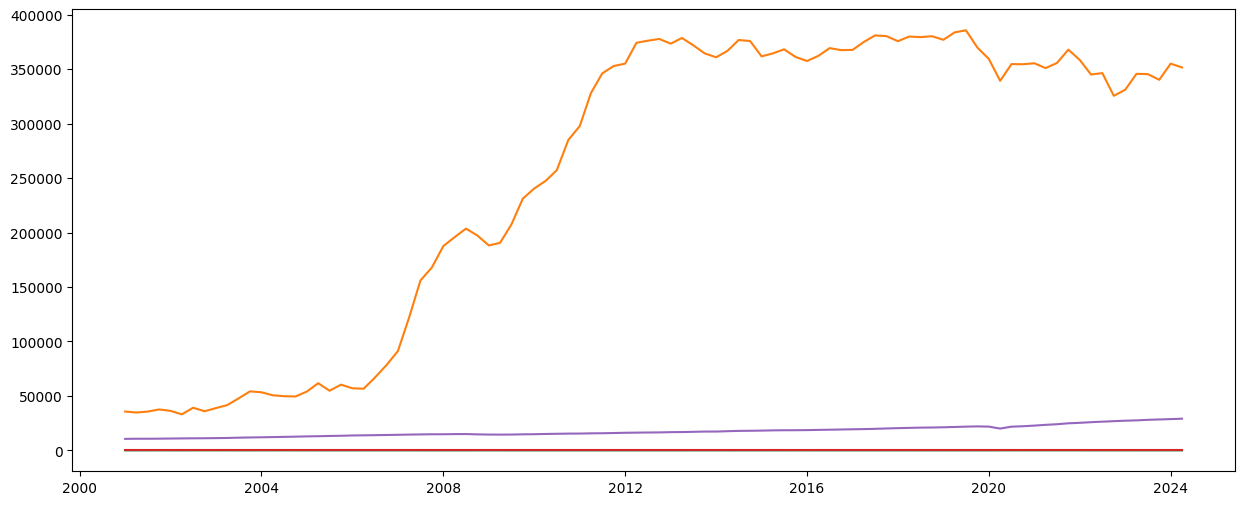

In [ ]:
#Visualizar o dado
plt.plot(data)

In [ ]:
from pmdarima import auto_arima

# Iterar sobre as colunas numéricas do DataFrame (excluindo a coluna de data)
for column in data.columns:
    # Selecione a série temporal para a coluna
    ts = data[column]

    # Verificar e tratar valores NaN (preenchendo com a média ou removendo)
    if ts.isnull().any():
        # Opção 1: Preencher com a média
        ts = ts.fillna(ts.mean())
        # Opção 2: Ou, você pode optar por remover as linhas com NaN
        # ts = ts.dropna()

    # Ajuste do modelo ARIMA
    stepwise_model = auto_arima(ts, start_p=1, start_q=1, start_d=0, start_P=0,
                                 max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

    # Exibir o AIC do modelo para cada coluna
    print(f"Modelo para a coluna {column}: AIC = {stepwise_model.aic()}")


 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=694.769, Time=0.59 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=696.369, Time=0.78 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=697.683, Time=0.60 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=696.291, Time=0.18 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=699.521, Time=0.46 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=697.860, Time=0.21 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=699.669, Time=0.31 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=696.250, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=697.864, Time=0.15 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=699.128, Time=0.42 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=697.786, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=700.907, Time=0.52 sec
 ARIMA(0,1,1)(2,0,0)[1

Treinando modelo SARIMAX para o Dólar...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Valor Dolar   No. Observations:                   42
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  20.401
Date:                Tue, 03 Dec 2024   AIC                            -24.802
Time:                        02:45:54   BIC                            -11.093
Sample:                             0   HQIC                           -19.810
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7257      0.075      9.632      0.000       0.578       0.873
x2            -0.0789      0.057     -1.374      0.169      -0.191       0.034
x3            -0.0145      0.027     -0.536      0.5

<ipython-input-15-df2e6f13149a>:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=36, freq='M')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


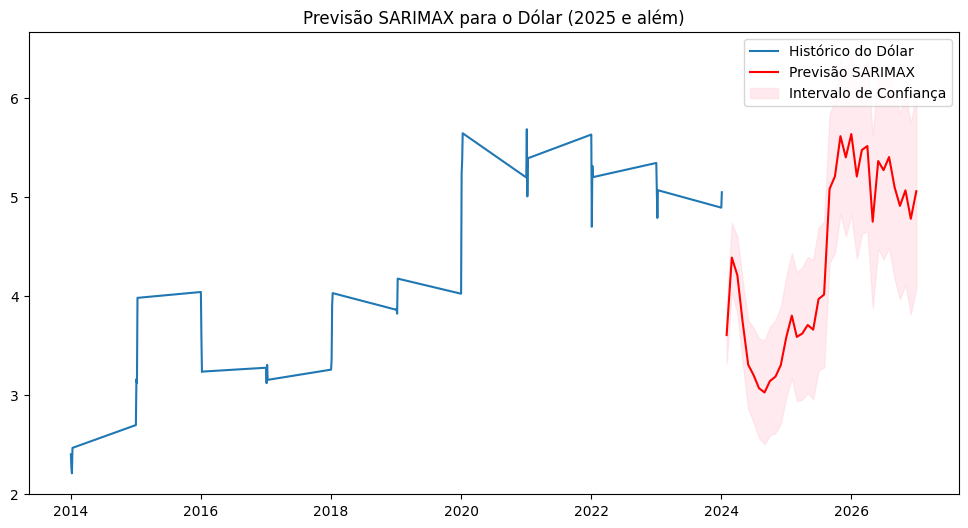

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from pmdarima import auto_arima

# Verifique se o índice é datetime
if not isinstance(data.index, pd.DatetimeIndex):
    raise ValueError("O índice dos dados deve estar no formato DatetimeIndex.")

# Variáveis do SARIMAX
variavel_alvo = 'Valor Dolar'
variaveis_explicativas = ['Taxa Real Efetiva', 'Reservas Internacionais', 'IPCA', 'Taxa Selic', 'PIB EUA']

# Preparar as séries para SARIMAX
if variavel_alvo in data.columns:
    print("Treinando modelo SARIMAX para o Dólar...")

    # Separar as séries
    y = data[variavel_alvo].dropna()
    X = data[variaveis_explicativas].dropna()

    # Sincronizar datas
    X, y = X.align(y, join='inner', axis=0)

    # Padronizar variáveis explicativas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Ajustar o modelo SARIMAX
    sarimax_model = SARIMAX(
        y, exog=X_scaled,
        order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)
    )
    resultado = sarimax_model.fit()

    # Resumo do modelo
    print(resultado.summary())

    # Fazer previsões (36 períodos futuros)
    future_dates = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=36, freq='M')
    X_future = X_scaled[-36:]  # Exemplo, ajuste conforme suas variáveis futuras
    sarimax_forecast = resultado.get_forecast(steps=36, exog=X_future)
    intervalo_confianca = sarimax_forecast.conf_int()
    previsoes_dolar = pd.Series(sarimax_forecast.predicted_mean.values, index=future_dates)

    # Visualizar previsões SARIMAX
    plt.figure(figsize=(12, 6))
    plt.plot(y, label='Histórico do Dólar')
    plt.plot(previsoes_dolar, label='Previsão SARIMAX', color='red')
    plt.fill_between(
        previsoes_dolar.index,
        intervalo_confianca.iloc[:, 0],
        intervalo_confianca.iloc[:, 1],
        color='pink', alpha=0.3, label='Intervalo de Confiança'
    )
    plt.legend()
    plt.title('Previsão SARIMAX para o Dólar (2025 e além)')
    plt.show()
